# Notebook for comparison of the best implementations
## Results presented in this notebook where used in my thesis.

In [1]:
import pandas as pd
import numpy as np
import sklearn.ensemble
import os.path
import sklearn.neural_network
import sklearn.svm
import sklearn.naive_bayes
import sklearn.tree
import lime.lime_tabular_mod
import lime.lime_tabular_multiregressor
import lime.lime_tabular_multiclassifier
import lime.lime_tabular_singleclassifier
import matplotlib.pyplot as plt
import doc.mod.utils.DatasetRepository as dr
import doc.mod.utils.ResultsProcessing as rp
from tqdm import tqdm

repo = dr.DatasetRepository("../data")


pd.set_option("display.max_columns", None)
pd.set_option("mode.chained_assignment", None)
plt.style.use({"figure.facecolor": "white"})

In [2]:
models = [
    "las losowy",
    "AdaBoost",
    "drzewo decyzyjne",
    "sieć neuronowa",
    "naiwny k. bayesowski",
    "kNN"
]
col_names = [
    "wariant oryginalny",
    "komitet drzew regresji",
    "komitet drzew decyzyjnych",
    "drzewo decyzyjne"
]

In [3]:
results = pd.concat({
    "Cardiotocography": pd.read_pickle("saved_results/fetal.pkl"),
    "Heart disease": pd.read_pickle("saved_results/heart.pkl"),
    "Mushrooms": pd.read_pickle("saved_results/mushrooms.pkl"),
    "Titanic": pd.read_pickle("saved_results/titanic.pkl"),
    "Red Wine Quality": pd.read_pickle("saved_results/wine.pkl")},
    names=["Zbiór danych"])
results.index.rename([
    "Zbiór danych",
    "Wyjaśniany model"],
    inplace=True)
results

default  multiregressor  \
Zbiór danych     Wyjaśniany model                                 
Cardiotocography las losowy            0.009281        0.004789   
                 AdaBoost              0.001775        0.000571   
                 drzewo decyzyjne      0.133030        0.062962   
                 sieć neuronowa        0.067550        0.043617   
                 naiwny k. bayesowski  0.041405        0.037108   
                 kNN                   0.027703        0.025972   
Heart disease    las losowy            0.015831        0.008707   
                 AdaBoost              0.000947        0.000138   
                 drzewo decyzyjne      0.187920        0.086911   
                 sieć neuronowa        0.020531        0.031350   
                 naiwny k. bayesowski  0.039884        0.048761   
                 kNN                   0.030604        0.027784   
Mushrooms        las losowy            0.008320        0.007830   
                 AdaBoost              0.004948        0.004883   
                 drzewo decyzyjne      0.089265        0.019934   
                 sieć neuronowa        0.137372        0.139113   
                 naiwny k. bayesowski  0.155998        0.155311   
                 kNN                   0.163013        0.164327   
Titanic          las losowy            0.020841        0.011713   
                 AdaBoost              0.002471        0.000052   
                 drzewo decyzyjne      0.160810        0.080272   
                 sieć neuronowa        0.009618        0.009782   
                 naiwny k. bayesowski  0.058587        0.055706   
                 kNN                   0.042471        0.025176   
Red Wine Quality las losowy            0.003362        0.002549   
                 AdaBoost              0.004166        0.000036   
                 drzewo decyzyjne      0.104957        0.072670   
                 sieć neuronowa        0.016766        0.008112   
                 naiwny k. bayesowski  0.014017        0.012561   
                 kNN                   0.022517        0.015387   

                                       multiclassifier  singleclassifier  
Zbiór danych     Wyjaśniany model                                         
Cardiotocography las losowy                   0.052984          0.051954  
                 AdaBoost                     0.085279          0.094437  
                 drzewo decyzyjne             0.080908          0.095148  
                 sieć neuronowa               0.086165          0.108797  
                 naiwny k. bayesowski         0.073383          0.080705  
                 kNN                          0.073079          0.079287  
Heart disease    las losowy                   0.110605          0.110800  
                 AdaBoost                     0.145294          0.146194  
                 drzewo decyzyjne             0.117795          0.119065  
                 sieć neuronowa               0.145374          0.122819  
                 naiwny k. bayesowski         0.132061          0.131477  
                 kNN                          0.155752          0.154329  
Mushrooms        las losowy                   0.185200          0.191020  
                 AdaBoost                     0.085730          0.084810  
                 drzewo decyzyjne             0.021626          0.016421  
                 sieć neuronowa               0.314786          0.302529  
                 naiwny k. bayesowski         0.237333          0.236695  
                 kNN                          0.327265          0.327210  
Titanic          las losowy                   0.106101          0.102542  
                 AdaBoost                     0.064988          0.064413  
                 drzewo decyzyjne             0.103281          0.094069  
                 sieć neuronowa               0.067320          0.105253  
                 naiwny k. bayesowski         0.087507          0.087744  
                 kNN

In [4]:
results.mean(axis=0)

default             0.053199
multiregressor      0.038803
multiclassifier     0.111243
singleclassifier    0.115236
dtype: float32

c:\users\kamil zych\documents\mgr\lime\venv\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


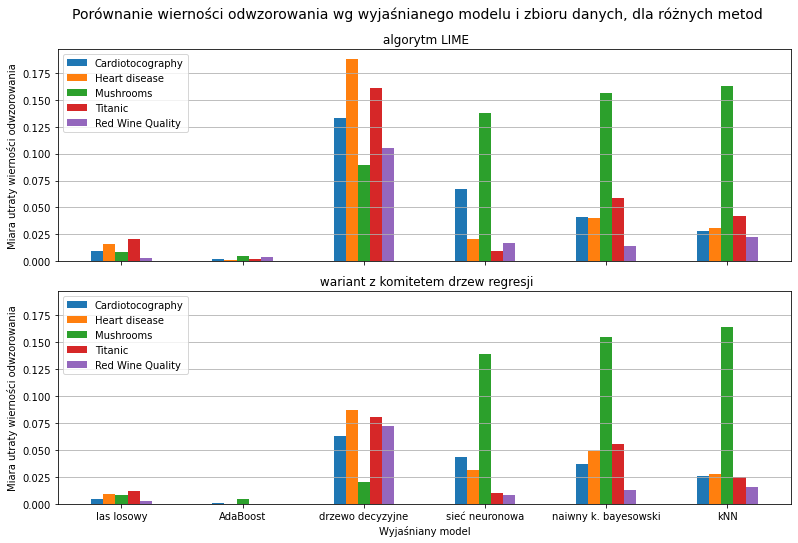

In [5]:
labels = models
label_locations = np.arange(len(labels))

bar_width = 0.1
fig, ax = plt.subplots(2, figsize=(12, 2*4), sharex=True, sharey=True)
fig.tight_layout(pad=5., h_pad=2.)
for i, (explainer_name, title_name) in enumerate([
    ("default", "algorytm LIME"),
    ("multiregressor", "wariant z komitetem drzew regresji")
]):
    for (bar_shift, dataset_name) \
            in zip(range(-2, +3), results.index.get_level_values(0).drop_duplicates()):
        ax[i].bar(
            label_locations + bar_shift * bar_width,
            results.loc[dataset_name, explainer_name],
            bar_width,
            label=dataset_name)

    ax[i].set_ylabel("Miara utraty wierności odwzorowania")
    ax[i].set_title(f" {title_name}")
    ax[i].set_xticks(label_locations)
    ax[i].set_xticklabels(labels)
    ax[i].legend()
    ax[i].grid(axis='y')
ax[i].set_xlabel("Wyjaśniany model")
fig.suptitle(
    "Porównanie wierności odwzorowania wg wyjaśnianego modelu i zbioru danych, dla różnych metod",
    size=14.
)
fig.show()

c:\users\kamil zych\documents\mgr\lime\venv\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


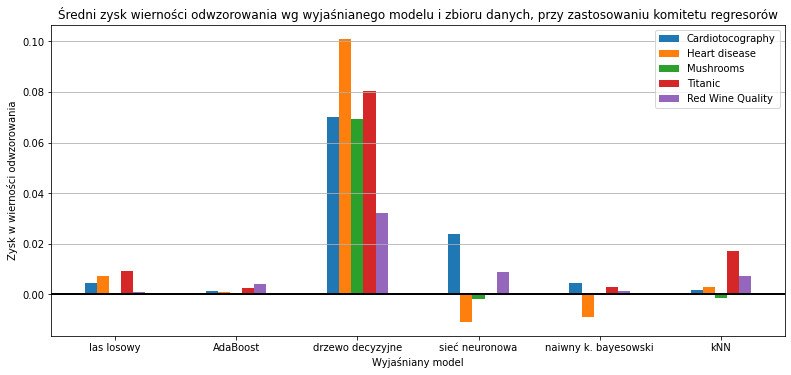

In [6]:
labels = models
label_locations = np.arange(len(labels))

bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 6))
fig.tight_layout(pad=5., h_pad=2.)
for (bar_shift, dataset_name) \
        in zip(range(-2, +3), results.index.get_level_values(0).drop_duplicates()):
    ax.bar(
        label_locations + bar_shift * bar_width,
        results.loc[dataset_name, "default"] \
            - results.loc[dataset_name, "multiregressor"],
        bar_width,
        label=dataset_name)

    ax.set_ylabel("Zysk w wierności odwzorowania")
    ax.set_title("Średni zysk wierności odwzorowania wg wyjaśnianego modelu i zbioru danych, przy zastosowaniu komitetu regresorów")
    ax.set_xticks(label_locations)
    ax.set_xticklabels(labels)
    ax.axhline(0.0, linestyle="-", color="black")
    ax.legend()
    ax.grid(axis='y')
ax.set_xlabel("Wyjaśniany model")
fig.show()
# fig.savefig("fidelity_gain_multiregressor.png")

c:\users\kamil zych\documents\mgr\lime\venv\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


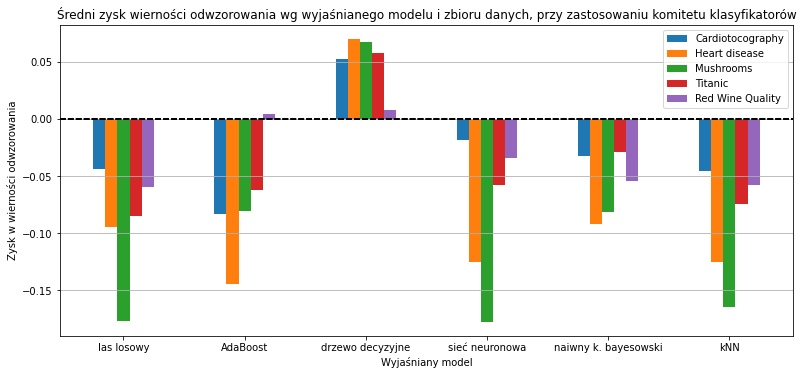

In [7]:
labels = models
label_locations = np.arange(len(labels))

bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 6))
fig.tight_layout(pad=5., h_pad=2.)
for (bar_shift, dataset_name) \
        in zip(range(-2, +3), results.index.get_level_values(0).drop_duplicates()):
    ax.bar(
        label_locations + bar_shift * bar_width,
        results.loc[dataset_name, "default"] \
            - results.loc[dataset_name, "multiclassifier"],
        bar_width,
        label=dataset_name)

    ax.set_ylabel("Zysk w wierności odwzorowania")
    ax.set_title("Średni zysk wierności odwzorowania wg wyjaśnianego modelu i zbioru danych, przy zastosowaniu komitetu klasyfikatorów")
    ax.set_xticks(label_locations)
    ax.set_xticklabels(labels)
    ax.axhline(0.0, linestyle="--", color="black")
    ax.legend()
    ax.grid(axis='y')
ax.set_xlabel("Wyjaśniany model")
fig.show()
